# canny test and vis

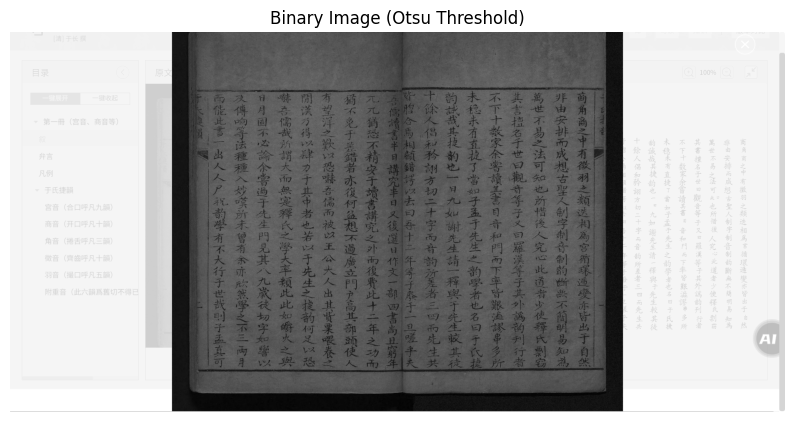

[INFO] auto_canny 阈值: lower=65, upper=130
[INFO] 列投影强度前五: [np.float32(219045.0), np.float32(164985.0), np.float32(160395.0), np.float32(134385.0), np.float32(120870.0)]


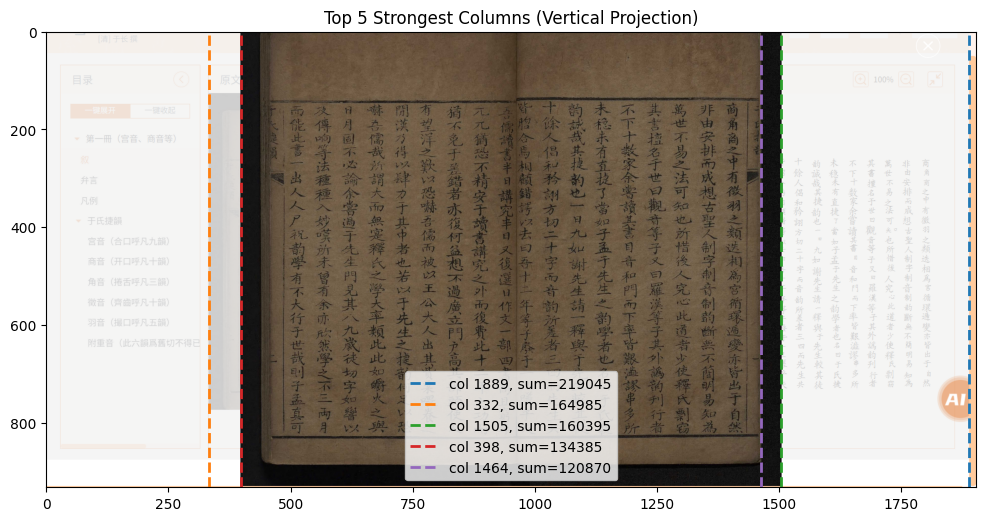

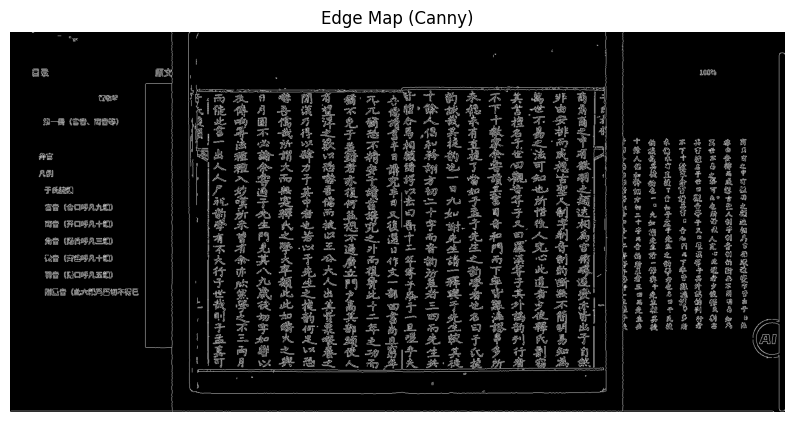

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ------ Config ------
IMG_PATH = Path("demo/data/1000380_1220163.png")
CANNY_SIGMA = 0.33
COL_THR_RATIO = 0.45

# ------ Functions ------
def auto_canny(gray, sigma=0.33):
    v = np.median(gray)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    return cv2.Canny(gray, lower, upper), lower, upper

# ------ Main ------
img = cv2.imread(str(IMG_PATH))
if img is None:
    raise FileNotFoundError(f"无法读取图片: {IMG_PATH}")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges, lower, upper = auto_canny(gray, sigma=CANNY_SIGMA)

# 显示二值化结果
plt.figure(figsize=(10, 6))
plt.title("Binary Image (Otsu Threshold)")
plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.show()

print(f"[INFO] auto_canny 阈值: lower={lower}, upper={upper}")

# 列投影
col_sum = edges.sum(axis=0).astype(np.float32)
top5 = sorted(col_sum, reverse=True)[:5]
print(f"[INFO] 列投影强度前五: {top5}")

top5_idx = col_sum.argsort()[-5:][::-1]  # 排序取前5列索引，降序

# 列投影可视化
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for i, idx in enumerate(top5_idx):
    plt.axvline(x=idx, color=plt.cm.tab10(i), linestyle="--", linewidth=2,
                label=f"col {idx}, sum={col_sum[idx]:.0f}")
plt.title("Top 5 Strongest Columns (Vertical Projection)")
plt.legend()
plt.show()

# 显示边缘检测结果
plt.figure(figsize=(10, 6))
plt.title("Edge Map (Canny)")
plt.axis("off")
plt.imshow(edges, cmap="gray")
plt.show()